In [1]:
import pandas as pd
import numpy as np

In [2]:
! ls data/zippedData

bom.movie_gross.csv.gz
imdb.name.basics.csv.gz
imdb.title.akas.csv.gz
imdb.title.basics.csv.gz
imdb.title.crew.csv.gz
imdb.title.principals.csv.gz
imdb.title.ratings.csv.gz
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [3]:
files_list = []

### Saving each file as a DF.

In [4]:
gross_bom = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
files_list.append(gross_bom)

In [5]:
names_imdb = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
files_list.append(names_imdb)

In [6]:
akas_imdb = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
files_list.append(akas_imdb)

In [7]:
movies_imdb = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
files_list.append(movies_imdb)

In [8]:
crew_imdb = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
files_list.append(crew_imdb)

In [9]:
principals_imdb = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
files_list.append(principals_imdb)

In [10]:
ratings_imdb = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
files_list.append(ratings_imdb)

In [11]:
info_rt = pd.read_csv('data/zippedData/rt.movie_info.tsv.gz', sep='\t')
files_list.append(info_rt)

In [12]:
reviews_rt = pd.read_csv('data/zippedData/rt.reviews.tsv.gz', sep='\t', encoding='latin1')
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 6558: invalid start byte
# Added latin1 encoding
files_list.append(reviews_rt)

In [13]:
movies_tmdb = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
files_list.append(movies_tmdb)

In [14]:
budgets_tn = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
files_list.append(budgets_tn)

### Merging the IMDb titles and ratings files

In [15]:
movies_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [16]:
ratings_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [17]:
imdb_movies_plus_ratings = \
movies_imdb.set_index('tconst').join(
    ratings_imdb.set_index('tconst'), on='tconst', how='left')

In [18]:
imdb_movies_plus_ratings

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN


### Seeing how many null values there are

In [19]:
print('Length of Movies Plus Ratings:', len(imdb_movies_plus_ratings))
print('Number of NaNs in averagerating and numvotes columns:', imdb_movies_plus_ratings.numvotes.isna().sum())

Length of Movies Plus Ratings: 146144
Number of NaNs in averagerating and numvotes columns: 72288


This is about half of the merged dataset.

#### Below, we view a sample of the titles where there are no ratings or votes.

They appear to be mostly foreign or niche titles, many with a runtime under one hour. They are not likely to be representative of the content Microsoft wants to promote as it debuts its streaming service. Perhaps we can drop these titles.

In [20]:
NaN_imdb_movies_plus_ratings = imdb_movies_plus_ratings[imdb_movies_plus_ratings.numvotes.isna()]

In [21]:
NaN_imdb_movies_plus_ratings.sample(20)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt9298716,Space Chase U.S.A.,Space Chase U.S.A.,2019,60.0,Documentary,NaN,NaN
tt6093094,The Groove Is Not Trivial,The Groove Is Not Trivial,2016,60.0,Documentary,NaN,NaN
tt9557926,Once it Was a Land Called Pomerania,Once it Was a Land Called Pomerania,2018,89.0,"Documentary,History",NaN,NaN
tt1653872,Je m'appelle Garance,Je m'appelle Garance,2010,82.0,Documentary,NaN,NaN
tt5731762,PDX: Brew City,PDX: Brew City,2016,NaN,Documentary,NaN,NaN
tt1861423,Simon Sez,Simon Sez,2010,NaN,Documentary,NaN,NaN
tt1699142,"Nkapa, une affaire africaine","Nkapa, une affaire africaine",2010,NaN,Documentary,NaN,NaN
tt6167996,Please Please Please,Please Please Please,2017,104.0,"Comedy,Crime,Drama",NaN,NaN
tt2368923,"Himalaya, le temps des filles","Himalaya, le temps des filles",2012,65.0,Documentary,NaN,NaN


In [22]:
# Dropping titles with no votes or rating

imdb_movies_plus_ratings.dropna(subset=['numvotes'], inplace=True)

In [23]:
# confirming that this worked for both the numvotes and averagerating columns:

print(imdb_movies_plus_ratings['averagerating'].isnull().sum())
print(imdb_movies_plus_ratings['numvotes'].isnull().sum())

0
0


In [24]:
imdb_movies_plus_ratings.sample(20)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt1836926,Stealing Las Vegas,Stealing Las Vegas,2012,87.0,"Crime,Thriller",4.0,350.0
tt5099004,Irrawaddy mon amour,Irrawaddy mon amour,2015,58.0,Documentary,6.6,10.0
tt2016868,Bogyó és Babóca - 13 ÚJ mese,Bogyó és Babóca - 13 ÚJ mese,2011,70.0,"Adventure,Animation,Family",7.7,27.0
tt5951550,To the Ends of the Earth,To the Ends of the Earth,2016,82.0,Documentary,7.2,16.0
tt4816906,Naciye,Naciye,2015,81.0,"Drama,Horror,Mystery",5.6,399.0
tt1270798,X-Men: First Class,X: First Class,2011,131.0,"Action,Adventure,Sci-Fi",7.7,608930.0
tt2043962,Twilight Portrait,Portret v sumerkakh,2011,105.0,Drama,6.5,672.0
tt1014794,Bad Dog and Superhero,Bad Dog and Superhero,2014,72.0,Comedy,5.5,15.0
tt5538704,Bullyparade: The Movie,Bullyparade: Der Film,2017,100.0,Comedy,4.9,2549.0


The values in the genres column contain multiple genres separated by a comma. We'll have to deal with this somehow.

I need to parse through the column somehow and make a list of individual genres.

In [25]:
# Reminding myself of the value types in this dataset:

imdb_movies_plus_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt0063540 to tt9916160
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73856 non-null  object 
 1   original_title   73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 4.5+ MB


In [26]:
imdb_movies_plus_ratings.shape

(73856, 7)

In [27]:
imdb_movies_plus_ratings['genres'].unique()

array(['Action,Crime,Drama', 'Biography,Drama', 'Drama', 'Comedy,Drama',
       'Comedy,Drama,Fantasy', 'Horror,Thriller',
       'Adventure,Animation,Comedy', 'History', 'Documentary',
       'Animation,Drama,History', 'Drama,Mystery',
       'Action,Animation,Comedy', 'Crime,Drama', nan,
       'Biography,Comedy,Drama', 'Action,Drama', 'Documentary,History',
       'Sci-Fi', 'Comedy', 'Thriller', 'Adventure,Animation,Sci-Fi',
       'Drama,Horror', 'Drama,Mystery,Thriller', 'Drama,Family',
       'Adventure,Comedy,Romance', 'Adventure,Drama,Romance',
       'Comedy,Crime,Drama', 'Biography', 'Horror',
       'Adventure,Comedy,Drama', 'Drama,Sci-Fi,Thriller', 'Action',
       'Comedy,Drama,Romance', 'Action,Adventure,Sci-Fi', 'Comedy,Family',
       'Adventure', 'Drama,History,War', 'Action,Thriller',
       'Comedy,Crime', 'Crime,Drama,Thriller', 'Action,Sci-Fi,Thriller',
       'Fantasy', 'Drama,Mystery,Sci-Fi', 'Biography,Drama,History',
       'Action,Comedy,Crime', 'Action,Advent

In [28]:
imdb_movies_plus_ratings['genres'].value_counts()

Drama                        11612
Documentary                  10313
Comedy                        5613
Horror                        2692
Comedy,Drama                  2617
                             ...  
Sport,Thriller                   1
Comedy,Sport,Western             1
Action,Music                     1
Comedy,Sci-Fi,Western            1
Documentary,Family,Sci-Fi        1
Name: genres, Length: 923, dtype: int64

In [29]:
imdb_movies_plus_ratings['genres'].isna().sum()

804

In [30]:
(imdb_movies_plus_ratings['genres'].isna().sum()) / imdb_movies_plus_ratings.shape[0]

0.010886048526863085

**1 percent of the genre column is null. We should probably drop those:**

In [31]:
imdb_movies_plus_ratings.dropna(subset=['genres'], inplace=True)

### Checking if there are any duplicate titles.

In [32]:
imdb_movies_plus_ratings.duplicated(subset='original_title').sum()

2707

**There are bound to be tons of movies with the same name out there.**

**Let's see if there are movies with the same name, runtime, and year.**

In [39]:
imdb_movies_plus_ratings[
    imdb_movies_plus_ratings.duplicated(
        subset=[
            'original_title', 'runtime_minutes', 'start_year'])]

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt10275936,Raggarjävlar (Swedish Greasers),Raggarjävlar (Swedish Greasers),2019,70.0,Documentary,6.9,47.0
tt1644694,The Gift,The Gift,2010,NaN,"Animation,Drama",5.9,7.0
tt1674217,Transit,Transit,2010,80.0,"Biography,Documentary,Family",6.7,13.0
tt1825978,The Artist,The Artist,2011,100.0,Thriller,6.8,6.0
tt1967651,Unconditional Love,Unconditional,2012,92.0,"Drama,Thriller",5.6,660.0
tt1977822,Inside,Inside,2012,85.0,Horror,4.0,397.0
tt2246595,Blood Money,Blood Money,2012,109.0,"Action,Drama,Thriller",5.2,881.0
tt2363471,The Summit,The Summit,2012,95.0,"Adventure,Documentary",6.9,4147.0
tt2805202,Rise of the Undead,Rise of the Undead,2013,70.0,Action,4.2,20.0


In [40]:
imdb_movies_plus_ratings[imdb_movies_plus_ratings['original_title'] == 'The Gift']

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt1445206,Discover the Gift,The Gift,2010,105.0,Documentary,7.6,46.0
tt1494821,The Gift,The Gift,2010,NaN,Drama,7.8,12.0
tt1644694,The Gift,The Gift,2010,NaN,"Animation,Drama",5.9,7.0
tt1993416,The Gift,The Gift,2011,NaN,Drama,7.2,17.0
tt4178092,The Gift,The Gift,2015,108.0,"Drama,Mystery,Thriller",7.1,123834.0
tt4420962,The Gift,The Gift,2017,82.0,Drama,6.0,17.0
tt6354904,The Gift,The Gift,2016,56.0,Documentary,6.2,6.0
tt8474974,The Gift,The Gift,2018,118.0,Drama,8.0,34.0


**We should delete the duplicates, but we should keep the version with the higher vote count.**

In [41]:
imdb_movies_plus_ratings.sort_values(by='numvotes', ascending=False, inplace=True)

In [42]:
imdb_movies_plus_ratings.drop_duplicates(subset=[
            'original_title', 'runtime_minutes', 'start_year'], inplace=True, keep='first')

In [55]:
imdb_movies_plus_ratings.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0
tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769.0
tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334.0
tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405.0
tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0


**Seeing what kind of relationship averagerating and numvotes have.**

<AxesSubplot:xlabel='averagerating', ylabel='numvotes'>

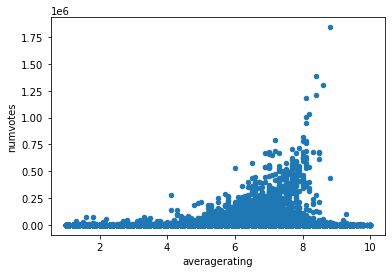

In [79]:
imdb_movies_plus_ratings.plot(kind='scatter', y='numvotes', x='averagerating')